# Initial noise in calorimetry data

_Produces Figure 6_

### Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter # for scalars in semilogy labels
from matplotlib.ticker import FormatStrFormatter

import numpy as np
from pranzo import Analyzer
from bamboost import Manager

from utilities import set_plot_theme, find_nearest
set_plot_theme()

### Specify the path to the database

The database can be downloaded from the [ETH Research Collection](https://www.research-collection.ethz.ch/)

In [2]:
database_path = ('../out')

db = Manager(database_path)

### Generate the figure

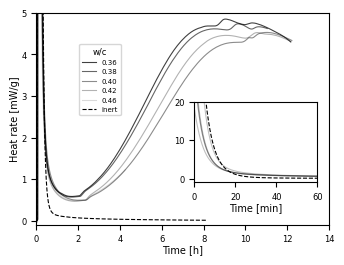

In [3]:
# read the data
exps = [
    db['opc36'], db['opc38'],
    db['opc40'], db['opc42'],
    db['opc46'],
]
inert = db['inert']
wcs = ['0.36', '0.38', '0.40', '0.42', '0.46']

# define figure and inset
fig_calonoise, ax_calonoise = plt.subplots(figsize=(90/25.4, 70/25.4))
inset_calonoise = ax_calonoise.inset_axes([0.54, 0.2, 0.42, 0.38])

# plot cement data
for i in range(len(exps)):
    a = Analyzer(exps[i])
    calo = a.calo
    idx_end = 22000

    t = calo.real_time_s[:idx_end]
    h = calo['norm_heat_flow_Wpgbinder'][:idx_end]
    ax_calonoise.plot(t*a.nft, h*a.nfh, c='k',
                       alpha=0.75-0.15*i, label=wcs[i])

    # shift delay to first peak
    i1 = float(exps[i].parameters['calo']['insertion_time_s_from_start_main_part_calo'])
    t = t - 1.5*find_nearest(t, i1)
    inset_calonoise.plot(t*1/60, h*a.nfh, c='k', alpha=0.25)
    
# plot inert data
a = Analyzer(inert)
calo = a.calo
idx_end = 22000

t = calo.real_time_s[:idx_end]
h = calo['norm_heat_flow_Wpgbinder'][:idx_end]
ax_calonoise.plot(t*a.nft, h*a.nfh, '--', c='k', lw=0.8, label='inert')

# shift delay to first peak
i1 = float(inert.parameters['calo']['insertion_time_s_from_start_main_part_calo'])
t = t - 1.5*find_nearest(t, i1)
inset_calonoise.plot(t*1/60, h*a.nfh, '--', c='k', lw=0.8)

# set axes limits
ax_calonoise.set_xlim(0, 14)
ax_calonoise.set_ylim(-0.1, 5)
inset_calonoise.set_xlim(0, 60)
inset_calonoise.set_ylim(-1, 20)

# set axes labels
ax_calonoise.set_xlabel("Time [h]")
ax_calonoise.set_ylabel("Heat rate [mW/g]")
inset_calonoise.set_xlabel(r"Time [min]")

# add legend
ax_calonoise.legend(bbox_to_anchor=(0.3, 0.5),
                    title='w/c')

# display figure
plt.tight_layout()
plt.show()